#### *Problem state:-*

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?


In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle
%matplotlib inline

In [11]:
data = pd.read_csv('Advertising.csv')

In [12]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
data.shape

(200, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [15]:
# missing values

data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<Axes: xlabel='newspaper', ylabel='sales'>

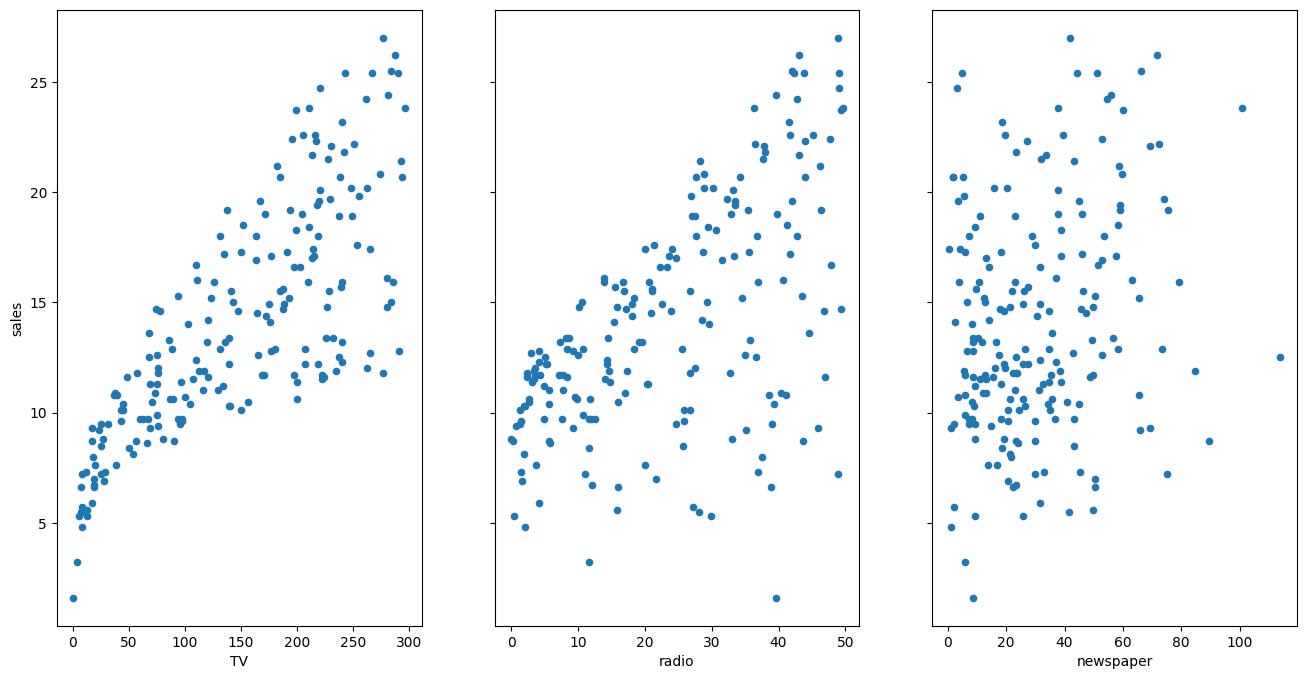

In [17]:
# visualizze the relationship between  the features and the response using scatterplot

fig, axs = plt.subplots(1,3,sharey=True)

data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

In [23]:
feature_cols = ['TV']
X=data[feature_cols]
y=data.sales

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


In [26]:
7.032593549127695 + 0.047536*50

9.409393549127696

In [27]:
## sales prediction of  9409 widgets in that market

In [28]:
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [29]:
lm.predict(X_new)

array([9.40942557])

In [31]:
## PLotting the least squares line

X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [32]:
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

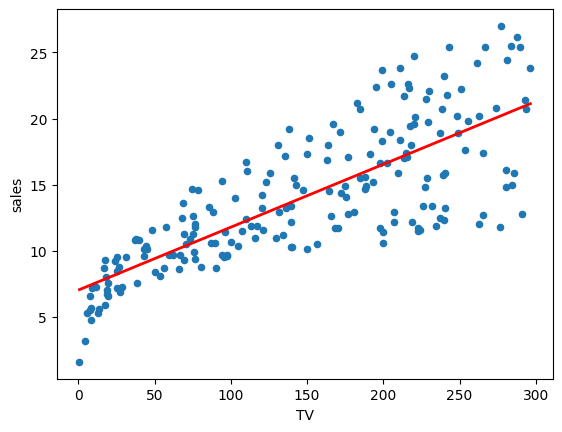

In [33]:
data.plot(kind='scatter',x='TV',y='sales')

plt.plot(X_new, preds, c='red', linewidth=2)